# Demo


## 0: Set-Up

Please run server before notebook:'

```
cd hamer
source .hamer/bin/activate
python run_server.py
```

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


import sys
sys.path.append('/home/gomer/oline')
print(sys.path)
import os


from PoseTools.data.parsers_and_processors.converters.vid_to_hamer import main_hamer
from PoseTools.data.parsers_and_processors.converters.pose_to_pkl import main
from PoseTools.src.modules.handedness.utils.graphics import PosePlotter
from PoseTools.src.modules.old_segmentation.segmentation import main_activation
from PoseTools.src.modules.handedness.utils.eval_1_2_hands import main_handedness
from PoseTools.src.modules.orientation.orientation import main_orientation
from PoseTools.src.modules.location.location import main_location
from PoseTools.src.modules.visualization.visualize import main_visualization

from IPython.display import Image, display
import os 


from PoseTools.src.modules.base.base import DataModule
from PoseTools.src.modules.activation.activation import main_activation

input_folder = "/home/gomer/oline/PoseTools/data/demo_files/sentences"
output_folder = '/home/gomer/oline/PoseTools/src/modules/server/public/'


['/home/gomer/miniconda3/envs/openhands/lib/python311.zip', '/home/gomer/miniconda3/envs/openhands/lib/python3.11', '/home/gomer/miniconda3/envs/openhands/lib/python3.11/lib-dynload', '', '/home/gomer/miniconda3/envs/openhands/lib/python3.11/site-packages', '/home/gomer/oline']


## 1: Data Preprocessing

### 1.1 Convert Videos to Hamer

In [ ]:
#main_hamer(input_folder)

### 1.2: Convert Videos to Pose Format

In [3]:
#!videos_to_poses --format mediapipe --directory "/home/gomer/oline/PoseTools/data/demo_files/sentences/video_files" 

# Load data file

In [9]:
%matplotlib inline

base_filename = "M20240828_0037"
base_filename = "M20240828_0046"
#base_filename = "M20240828_0064"
#base_filename = "M20241106_6115"
#base_filename = "M20241106_6111"
#base_filename = "M20241106_6113"
#base_filename = "M20241107_6254"
#base_filename = "M20240925_1836"
#base_filename = "M20240925_1819"
#base_filename = "M20240925_1822"
        
data = DataModule(base_filename, base_dir = input_folder)

#gif_path = '/home/gomer/oline/PoseTools/src/modules/demo/demo_files/graphics/gifs/'+base_filename+'.gif'


Total frames captured: 390
Total frames: 390
Pose data frames: 390
Left HAMER frames: 390
Right HAMER frames: 390


In [ ]:
dat = data.hamer_left[0]

(390, 21, 3)

# Sign Activity 


This function returns a __Sign Activity Array__ of dimension (2, 1). The first component is the left hand, and the second is the right hand. The arrays contains a boolean mask indecating when a hand is active in signing and when it is resting. 

390
Hammer left shape (390, 21, 3)
Hammer right shape (390, 21, 3)

Left hand movement starts at frame 39
Left hand movement ends at frame 104

Right hand movement starts at frame 24
Right hand movement ends at frame 103


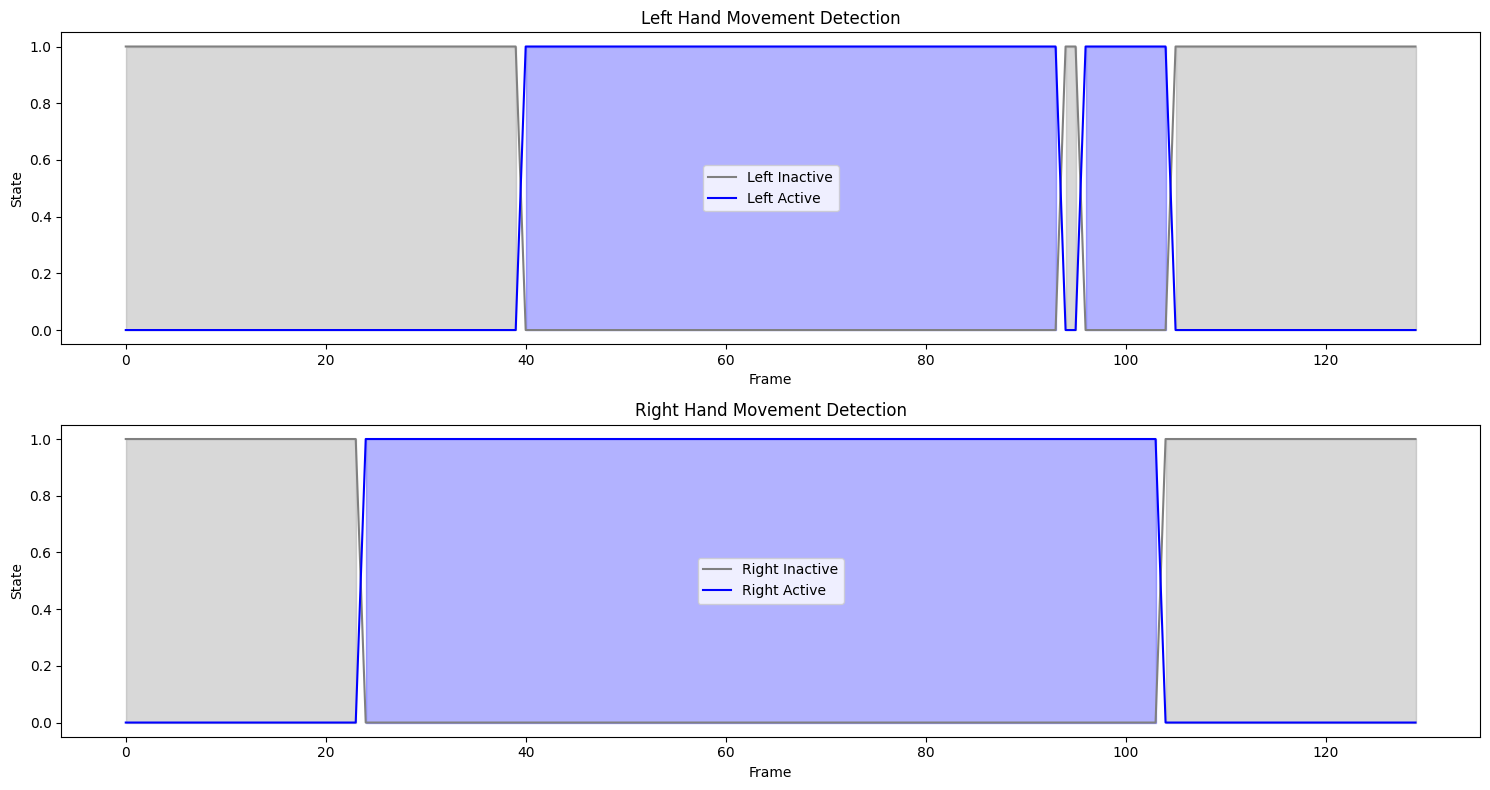

In [10]:
boolean_activity_arrays, sign_activity_arrays, start, stop = main_activation(data, n_components = 2)


In [ ]:
boolean_activity_arrays, sign_activity_arrays = data.select_data(start, stop, skip = 3, boolean_activity_arrays = boolean_activity_arrays, sign_activity_arrays = sign_activity_arrays) 


## 2.0 Module 1 - Evaluate Handedness

This works if we only consider uncropped lexical video where the starting position is static 
Or it appears to work if there is only one hand in the video 
It might also work if the one hand starts a lot higher than the other



In [11]:
# TODO - setup for loading data with new base class
handedness = main_handedness(boolean_activity_arrays)


## 2.1 Module 2 - Determine Handshape 

In [12]:
from PoseTools.src.modules.handshapes.engines.ed_algorithm.handshape import main_handshape

handshape_predictions= main_handshape(data, input_folder + '/hamer_pkl', output_folder, boolean_arrays=boolean_activity_arrays, base_filename='normalized_' +base_filename)

Reference poses loaded: ['Q', 'C_spread', 'M', 'P', 'A', 'I', 'Beak_open_spread', 'Y', '1', 'N', '5r', 'C2_spread', 'Baby_C', '5m_closed', 'ILY', 'C', 'Beak', 'O', '5m', 'K', 'V_curved', 'Beak_spread', 'B', 'D', 'Baby_beak_open', 'Money', 'Baby_beak', '5', 'L2', 'L', 'R', '3', 'T', '5r_closed', '4', 'Beak_open', 'V', 'Baby_O', '1_curved', 'Beak2_open_spread', 'T_open', 'Horns', 'W', 'S', 'E', 'Flower']
Number of reference poses: 46
Processing file: /home/gomer/oline/PoseTools/data/demo_files/sentences/hamer_pkl/normalized_M20240828_0046-R.pkl


Processing Frames:  13%|█▎        | 49/390 [00:00<00:00, 485.06frame/s]

Frame 0 is empty.
Frame 1 is empty.
Frame 69 is empty.
Frame 70 is empty.


Processing Frames: 100%|██████████| 390/390 [00:00<00:00, 531.35frame/s]


Frame 286 is empty.
Frame 287 is empty.
Frame 342 is empty.
Frame 343 is empty.
Frame 344 is empty.
Processing file: /home/gomer/oline/PoseTools/data/demo_files/sentences/hamer_pkl/normalized_M20240828_0046-L.pkl


Processing Frames:  56%|█████▋    | 220/390 [00:00<00:00, 544.39frame/s]

Frame 115 is empty.
Frame 116 is empty.
Frame 169 is empty.
Frame 170 is empty.


Processing Frames: 100%|██████████| 390/390 [00:00<00:00, 542.45frame/s]


## 2.3 Module 3 - Location

In [13]:
locations = main_location(data, print_results = False)


## 2.4 Module 4 - Orientation

In [14]:
orientations = main_orientation(data, print_results=False)


# Main Plotting

In [ ]:

main_visualization(data, save_anim_path=gif_path, 
                   sign_activity_arrays=sign_activity_arrays, 
                   boolean_activity_arrays = boolean_activity_arrays,
                   handshapes = handshape_predictions, 
                   handedness = handedness, 
                   orientations = orientations, 
                   locations = locations)

from IPython.display import Image, display

# Display the GIF\
display(Image(filename=gif_path))


# Evaluate multiple files

In [ ]:
#base_filenames = ['M20240925_1819','M20240828_0064','M20240828_0046','M20240828_0037', "M20241106_6111", "M20241106_6113", "M20241106_6115", "M20241106_6118","M20241107_6254"]
base_filenames = [filename[:-4] for filename in os.listdir(input_folder + '/video_files') if filename.endswith('.mp4')]
print(base_filenames)   
%matplotlib inline
#base_filenames = ['M20241113_6960','M20241107_6272', "M20241107_6271"]
for base_filename in base_filenames:
    print('Processing video ', base_filename)
    data = DataModule(base_filename)

    gif_path = '/home/gomer/oline/PoseTools/src/modules/demo/demo_files/graphics/gifs/'+base_filename+'.gif'
    boolean_activity_arrays, sign_activity_arrays, start, stop = main_activation(data, n_components = 2)
    print(len(boolean_activity_arrays[0]), len(boolean_activity_arrays[1]))
    import numpy as np
    boolean_activity_arrays = [np.ones(len(boolean_activity_arrays[0])), np.ones(len(boolean_activity_arrays[1]))]
    
    boolean_activity_arrays, sign_activity_arrays = data.select_data(start, stop, skip = 5, boolean_activity_arrays = boolean_activity_arrays, sign_activity_arrays = sign_activity_arrays) 
    print(len(boolean_activity_arrays[0]), len(boolean_activity_arrays[1]))
    # TODO - setup for loading data with new base class
    handedness = main_handedness(boolean_activity_arrays)
    from PoseTools.src.modules.handshapes.engines.ed_algorithm.handshape import main_handshape

    handshape_predictions= main_handshape(data, input_folder + '/hamer_pkl', output_folder, boolean_arrays=boolean_activity_arrays, base_filename='normalized_' +base_filename)
    print(handshape_predictions)
    locations = main_location(data, print_results = False)
    orientations = main_orientation(data, print_results=False)
    
    main_visualization(data, save_anim_path=gif_path, 
                       boolean_activity_arrays=boolean_activity_arrays,
                    sign_activity_arrays=sign_activity_arrays, 
                    handshapes = handshape_predictions, 
                    handedness = handedness, 
                    orientations = orientations, 
                    locations = locations)

    from IPython.display import Image, display
    
    # Display the GIF\
    #display(Image(filename=gif_path))


In [ ]:
#base_filenames = ['M20240925_1819','M20240828_0064','M20240828_0046','M20240828_0037', "M20241106_6111", "M20241106_6113", "M20241106_6115", "M20241106_6118","M20241107_6254"]
base_filenames = [filename[:-4] for filename in os.listdir(input_folder + '/video_files') if filename.endswith('.mp4')]
print(base_filenames)   
%matplotlib inline
angles_dict = {}
normals_dict = {}
#base_filenames = ['M20241113_6960','M20241107_6272', "M20241107_6271"]
for base_filename in base_filenames[1:]:
    print('Processing video ', base_filename)
    data = DataModule(base_filename)

    gif_path = '/home/gomer/oline/PoseTools/src/modules/demo/demo_files/graphics/gifs/'+base_filename+'.gif'
    boolean_activity_arrays, sign_activity_arrays, start, stop = main_activation(data, n_components = 2)
    print(len(boolean_activity_arrays[0]), len(boolean_activity_arrays[1]))
    
    boolean_activity_arrays, sign_activity_arrays = data.select_data(start, stop, skip = 3, boolean_activity_arrays = boolean_activity_arrays, sign_activity_arrays = sign_activity_arrays) 
    print(len(boolean_activity_arrays[0]), len(boolean_activity_arrays[1]))
    # TODO - setup for loading data with new base class
    #handedness = main_handedness(boolean_activity_arrays)
    #from PoseTools.src.modules.handshapes.engines.ed_algorithm.handshape import main_handshape

    #handshape_predictions= main_handshape(data, input_folder + '/hamer_pkl', output_folder, boolean_arrays=boolean_activity_arrays, base_filename='normalized_' +base_filename)
    #locations = main_location(data, print_results = False)
    orientations, angles, normals = main_orientation(data, print_results=False, return_angles=True)
    angles_dict[base_filename] = angles
    normals_dict[base_filename] = normals


In [15]:
theta_dict = {}
phi_dict = {}
zone_dict = {}
for base_filename, angles in angles_dict.items():
    theta = []
    phi = []
    zone = []
    for entry in angles[0]:
        theta.append(entry['theta'])
        phi.append(entry['phi'])
        zone.append(entry['zone'])
    theta_dict[base_filename] = theta
    phi_dict[base_filename] = phi
    zone_dict[base_filename] = zone
    

NameError: name 'angles_dict' is not defined

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Initialize data for plotting
colors = ['r', 'g', 'b', 'purple', 'orange', 'brown', 'cyan', 'pink', 'grey']
file_count = 0

# Loop through the dictionary to plot each file's x, y, z components in separate subplots
for filename, vectors in normals_dict.items():
    file_count += 1
    print(file_count)
    if file_count == 3:
        vectors = np.array(vectors[0])  # Convert list of lists into a numpy array
        zones = zone_dict[filename]  # Get corresponding zone labels
        print(zones)
        
        # Scatter plot x components in the first subplot
        print(len(np.arange(len(vectors[:, 0]))), len(vectors[:, 0]))
        axes[0].scatter(np.arange(len(vectors[:, 0])), vectors[:, 0], label=f'{filename} - X', color=colors[file_count % len(colors)])
        for i, (x, label) in enumerate(zip(vectors[:, 0], zones)):
            axes[0].text(i, x, label, fontsize=8, rotation=90, ha='center', alpha=0.7)
        
        # Scatter plot y components in the second subplot
        axes[1].scatter(np.arange(len(vectors[:, 0])), vectors[:, 1], label=f'{filename} - Y', color=colors[file_count % len(colors)])
        for i, (y, label) in enumerate(zip(vectors[:, 1], zones)):
            axes[1].text(i, y, label, fontsize=8, rotation=90, ha='center', alpha=0.7)
        
        # Scatter plot z components in the third subplot
        axes[2].scatter(np.arange(len(vectors[:, 0])), vectors[:, 2], label=f'{filename} - Z', color=colors[file_count % len(colors)])
        for i, (z, label) in enumerate(zip(vectors[:, 2], zones)):
            axes[2].text(i, z, label, fontsize=8, rotation=90, ha='center', alpha=0.7)
        
        
    else:
        continue

    
# Set titles and labels
axes[0].set_title('X Dimension')
axes[0].set_ylabel('X Value')
axes[1].set_title('Y Dimension')
axes[1].set_ylabel('Y Value')
axes[2].set_title('Z Dimension')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Z Value')

# Add legends
axes[0].legend()


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Create subplots with two rows and one column
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

count = 0
# Plot theta_dict in the first subplot
for key, item in theta_dict.items():
    if count < 5:
        idx = np.arange(len(item))
        scatter = axes[0].scatter(idx, item, label=key)
        
        # Add small labels using zone_dict
        for i, (x, y) in enumerate(zip(idx, item)):
            axes[0].text(x, y, zone_dict[key][i], fontsize=8, alpha=0.7, rotation = 90)
    count += 1

axes[0].set_title('Theta Dictionary')
axes[0].legend()
axes[0].set_ylabel('Values')

count = 0
# Plot phi_dict in the second subplot
for key, item in phi_dict.items():
    if count < 5:
        idx = np.arange(len(item))
        item = np.array(item) 
        vals = []
        for i in item:
            if i > 180:
                vals.append(i - 360)
            else:
                vals.append(i)
        scatter = axes[1].scatter(idx, vals, label=key)
        
        # Add small labels using zone_dict
        for i, (x, y) in enumerate(zip(idx, vals)):
            axes[1].text(x, y, zone_dict[key][i], fontsize=8, alpha=0.7, rotation = 90)
    count += 1

axes[1].set_title('Phi Dictionary')
axes[1].legend()
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Create subplots with two rows and one column
fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)

count = 0
# Plot theta_dict in the first subplot
for key, item in theta_dict.items():
    if count < 5:
        idx = np.arange(len(item))
        scatter = axes[0].scatter(idx, item, label=key)
        
        # Add small labels using zone_dict
        for i, (x, y) in enumerate(zip(idx, item)):
            axes[0].text(x, y, zone_dict[key][i], fontsize=8, alpha=0.7, rotation = 90)
    count += 1

axes[0].set_title('Theta Dictionary')
axes[0].legend()
axes[0].set_ylabel('Values')

count = 0
# Plot phi_dict in the second subplot
for key, item in phi_dict.items():
    if count < 5:
        idx = np.arange(len(item))
        item = np.array(item) 
        vals = []
        for i in item:
            if i > 180:
                vals.append(i - 360)
            else:
                vals.append(i)
        scatter = axes[1].scatter(idx, vals, label=key)
        
        # Add small labels using zone_dict
        for i, (x, y) in enumerate(zip(idx, vals)):
            axes[1].text(x, y, zone_dict[key][i], fontsize=8, alpha=0.7, rotation = 90)
    count += 1

axes[1].set_title('Phi Dictionary')
axes[1].legend()
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
